## Práctica 7: Red Neuronal Multiclase. Evaluacion detallada 

Grupo 5: Jorge Ortega y Daniela Vidal

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [72]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [73]:
def gen_blobs():
    classes = 6
    m = 800
    std = 0.4
    centers = np.array([[-1, 0],[1, 0],[0, 1],[0, -1],[-2,1],[-2,-1]])
    X, y = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=2, n_features=2)
    return (X, y, centers, classes, std) 

In [74]:
X, y, centers, classes, std = gen_blobs()
X.shape

(800, 2)

Vemos cuántos elementos hay en cada clase

In [107]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([55, 61, 51, 51, 49, 53]))

Como podemos observar están relativamente balanceadas, por lo que no hace falta hacer un tratamiento especial para equilibrarlas.

Separamos en un 60% de los datos para entrenamiento, 20% para validación y 20% para test.

In [75]:
X_train, X, y_train, y = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

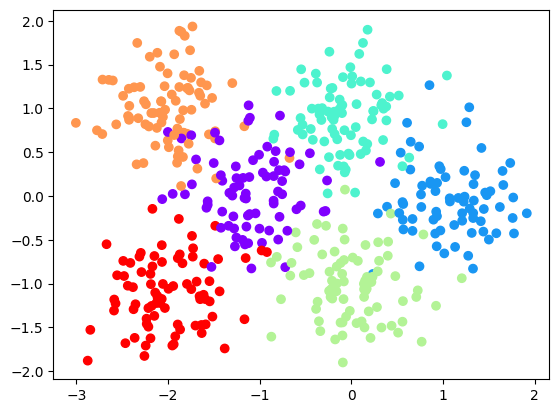

In [76]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='rainbow')

Tenemos datos que tienen un valor X y un valor Y que se asignan a una de 6 posibles clusters (del 0 al 5). El objetivo es predecir el cluster al que pertenece un punto. Por tanto es un problema de clasificación multiclase.

In [77]:
iters = 1000

# 1. Modelo complejo con muchas neuronas

Vamos a hacer un primer modelo con muchas neuronas para ver si es capaz de aprender los datos.
Tendrá 3 capas ocultas, la primera con 150 neuronas, la segunda con 50 y la última con 6, una por cada clase.

In [78]:
complex_model = Sequential(
    [Dense(units = 150,activation = 'relu'), 
     Dense(units = 50,activation = 'relu'), 
     Dense(units = 6,activation = 'linear')]
)

Las capas ocultas las hacemos con ReLu ya que este es el óptimo para este tipo de problemas. En la última neurona, al ser un problema de multi clasificación, usamos lineal con adam ya que es la combinación con la que mejor resultados obtuvimos en la práctica 6.

In [79]:
complex_model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=1e-3),
    metrics = ['accuracy'])

complex_model.fit(X_train, y_train, epochs=iters, validation_data=(X_val, y_val))

Epoch 1/1000
15/15 [==============================] - 1s 17ms/step - loss: 1.6101 - accuracy: 0.5208 - val_loss: 1.4287 - val_accuracy: 0.6500
Epoch 2/1000
15/15 [==============================] - 0s 7ms/step - loss: 1.2759 - accuracy: 0.7208 - val_loss: 1.1226 - val_accuracy: 0.7312
Epoch 3/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.9956 - accuracy: 0.7688 - val_loss: 0.8658 - val_accuracy: 0.7812
Epoch 4/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7695 - accuracy: 0.7875 - val_loss: 0.6744 - val_accuracy: 0.7750
Epoch 5/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6079 - accuracy: 0.8146 - val_loss: 0.5399 - val_accuracy: 0.8562
Epoch 6/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5005 - accuracy: 0.8354 - val_loss: 0.4580 - val_accuracy: 0.8562
Epoch 7/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4360 - accuracy: 0.8521 - val_loss: 0.4033 - val_accuracy: 0.8813
Epoch

Precisión para los datos de entrenamiento:

In [109]:
c_m_f = tf.nn.softmax(complex_model(X_train), axis=1)
c_m_pred = tf.argmax(c_m_f, axis=1)

In [110]:
print("Train accuracy complex model: ", np.sum(c_m_pred == y_train)/len(y_train))

Train accuracy complex model:  0.9479166666666666


Precisión para los datos de test:

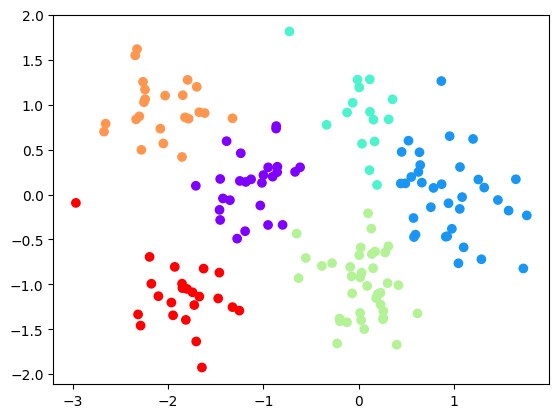

In [111]:
c_m_f = tf.nn.softmax(complex_model(X_test), axis=1)
c_m_pred = tf.argmax(c_m_f, axis=1)

plt.scatter(X_test[:,0], X_test[:,1], c=c_m_pred, cmap='rainbow')

In [112]:
print("Test accuracy complex model: ", np.sum(c_m_pred == y_test)/len(y_test))

Test accuracy complex model:  0.91875


# 2. Modelo simple con pocas neuronas

Vamos a hacer un primer modelo con pocas neuronas.
Tendrá 3 capas ocultas, la primera con 9 neuronas, la segunda con 7 y la última con 6, una por cada clase.

In [84]:
simple_model = Sequential(
    [Dense(units = 8,activation = 'relu'), 
     Dense(units = 7,activation = 'relu'), 
     Dense(units = 6,activation = 'linear')]
)

Dejaremos el resto de parámetros igual que en el modelo anterior para que la comparación de ambos sea únicamente por simple/complejo.

In [85]:
simple_model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=1e-3),
    metrics = ['accuracy'])

simple_model.fit(X_train, y_train, epochs=iters, validation_data=(X_val, y_val))

Epoch 1/1000
15/15 [==============================] - 1s 13ms/step - loss: 1.8326 - accuracy: 0.0750 - val_loss: 1.8126 - val_accuracy: 0.1813
Epoch 2/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.7886 - accuracy: 0.2250 - val_loss: 1.7709 - val_accuracy: 0.2438
Epoch 3/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.7496 - accuracy: 0.2875 - val_loss: 1.7324 - val_accuracy: 0.3250
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.7114 - accuracy: 0.3938 - val_loss: 1.6920 - val_accuracy: 0.4000
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.6701 - accuracy: 0.4146 - val_loss: 1.6465 - val_accuracy: 0.4187
Epoch 6/1000
15/15 [==============================] - 1s 36ms/step - loss: 1.6223 - accuracy: 0.4521 - val_loss: 1.5976 - val_accuracy: 0.4625
Epoch 7/1000
15/15 [==============================] - 0s 7ms/step - loss: 1.5720 - accuracy: 0.4833 - val_loss: 1.5503 - val_accuracy: 0.5125
Epoc

Precisión para los datos de entrenamiento:

In [113]:
s_m_f = tf.nn.softmax(simple_model(X_train), axis=1)
s_m_pred = tf.argmax(s_m_f, axis=1)

In [114]:
print("Train accuracy simple model: ", np.sum(s_m_pred == y_train)/len(y_train))

Train accuracy simple model:  0.91875


Precisión para los datos de test:

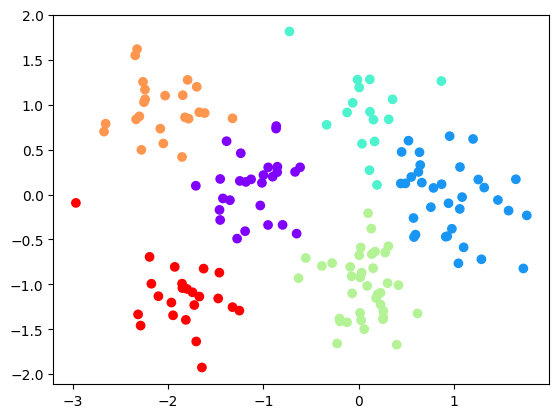

In [115]:
s_m_f = tf.nn.softmax(simple_model(X_test), axis=1)
s_m_pred = tf.argmax(s_m_f, axis=1)

plt.scatter(X_test[:,0], X_test[:,1], c=s_m_pred, cmap='rainbow')

In [116]:
print("Test accuracy simple model: ", np.sum(s_m_pred == y_test)/len(y_test))

Test accuracy simple model:  0.93125


# 3. Modelo complejo con regularización

Usaremos los mismos parámetros que en la compleja pero con regularización.

### 3.1 Primero averiguaremos el mejor valor para el parámetro de regularización

In [90]:
def parameter_decision(X_train, y_train, X_val, y_val, X_test, y_test):
    acc = list()
    lambdas = [0.001, 0.01, 0.1, 1]
    for l in lambdas:
        reg_model = Sequential(
            [Dense(units = 150,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l)),
            Dense(units = 50,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l)),
            Dense(units = 6,activation = 'linear')]
        )
        reg_model.compile(
            loss = SparseCategoricalCrossentropy(from_logits=True),
            optimizer = Adam(learning_rate=1e-3),)
        
        reg_model.fit(X_train, y_train, epochs=iters, validation_data=(X_val, y_val))

        r_m_f = tf.nn.softmax(reg_model(X_test), axis=1)
        r_m_pred = tf.argmax(r_m_f, axis=1)
        aux = np.sum(r_m_pred == y_test)/len(y_test)
        acc.append(aux)
    return acc, lambdas

In [91]:
acc, lambdas = parameter_decision(X_train, y_train, X_val, y_val, X_test, y_test)

Epoch 1/1000
15/15 [==============================] - 1s 14ms/step - loss: 1.7601 - val_loss: 1.5928
Epoch 2/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.4774 - val_loss: 1.3308
Epoch 3/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.2217 - val_loss: 1.0768
Epoch 4/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.9687 - val_loss: 0.8457
Epoch 5/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7605 - val_loss: 0.6748
Epoch 6/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6267 - val_loss: 0.5747
Epoch 7/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5421 - val_loss: 0.5100
Epoch 8/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4958 - val_loss: 0.4743
Epoch 9/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.4637 - val_loss: 0.4517
Epoch 10/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4404 - val_loss: 0.432

Visualizamos los datos

[0.91875, 0.93125, 0.9375, 0.15625]

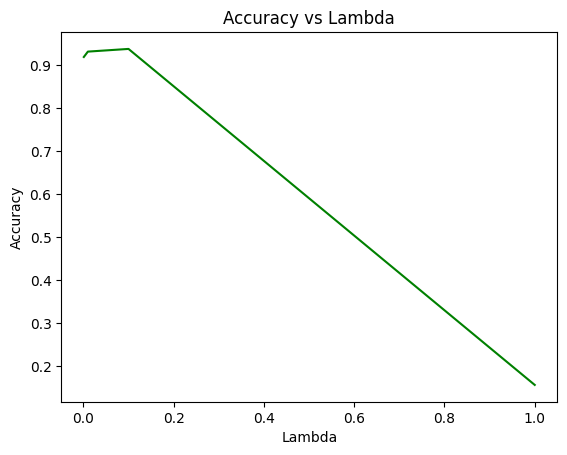

In [92]:
plt.plot(lambdas, acc, color="green")
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Lambda")
acc

In [93]:
best_lambda = lambdas[np.argmax(acc)]
best_lambda

0.1

Aqui se puede observar el mejor valor para el parámetro de regularización.

In [94]:
reg_model = Sequential(
    [Dense(units = 150,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(best_lambda)),
    Dense(units = 50,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(best_lambda)),
    Dense(units = 6,activation = 'linear')]
)

In [95]:
reg_model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=1e-3),
    metrics = ['accuracy'])

reg_model.fit(X_train, y_train, epochs=iters, validation_data=(X_val, y_val))

Epoch 1/1000
15/15 [==============================] - 1s 23ms/step - loss: 8.7858 - accuracy: 0.2583 - val_loss: 7.7752 - val_accuracy: 0.4625
Epoch 2/1000
15/15 [==============================] - 0s 11ms/step - loss: 7.0331 - accuracy: 0.5625 - val_loss: 6.2348 - val_accuracy: 0.5813
Epoch 3/1000
15/15 [==============================] - 0s 6ms/step - loss: 5.6546 - accuracy: 0.6896 - val_loss: 5.0362 - val_accuracy: 0.7250
Epoch 4/1000
15/15 [==============================] - 0s 8ms/step - loss: 4.5797 - accuracy: 0.7437 - val_loss: 4.1027 - val_accuracy: 0.7688
Epoch 5/1000
15/15 [==============================] - 0s 7ms/step - loss: 3.7488 - accuracy: 0.7688 - val_loss: 3.3844 - val_accuracy: 0.7812
Epoch 6/1000
15/15 [==============================] - 0s 8ms/step - loss: 3.1116 - accuracy: 0.7729 - val_loss: 2.8358 - val_accuracy: 0.7688
Epoch 7/1000
15/15 [==============================] - 0s 7ms/step - loss: 2.6236 - accuracy: 0.7771 - val_loss: 2.4138 - val_accuracy: 0.7812
Epoc

Precisión para los datos de entrenamiento:

In [117]:
r_m_f = tf.nn.softmax(reg_model(X_train), axis=1)
r_m_pred = tf.argmax(r_m_f, axis=1)

In [118]:
print("Train accuracy regularized model: ", np.sum(r_m_pred == y_train)/len(y_train))

Train accuracy regularized model:  0.9104166666666667


Precisión para los datos de test:

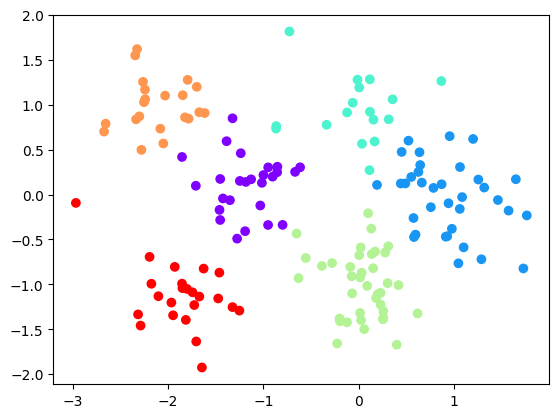

In [119]:
r_m_f = tf.nn.softmax(reg_model(X_test), axis=1)
r_m_pred = tf.argmax(r_m_f, axis=1)

plt.scatter(X_test[:,0], X_test[:,1], c=r_m_pred, cmap='rainbow')

In [120]:
print("Test accuracy regularized model: ", np.sum(r_m_pred == y_test)/len(y_test))

Test accuracy regularized model:  0.91875


# 4. Pintamos las curvas de aprendizaje de precisión y de pérdida

In [100]:
print(complex_model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


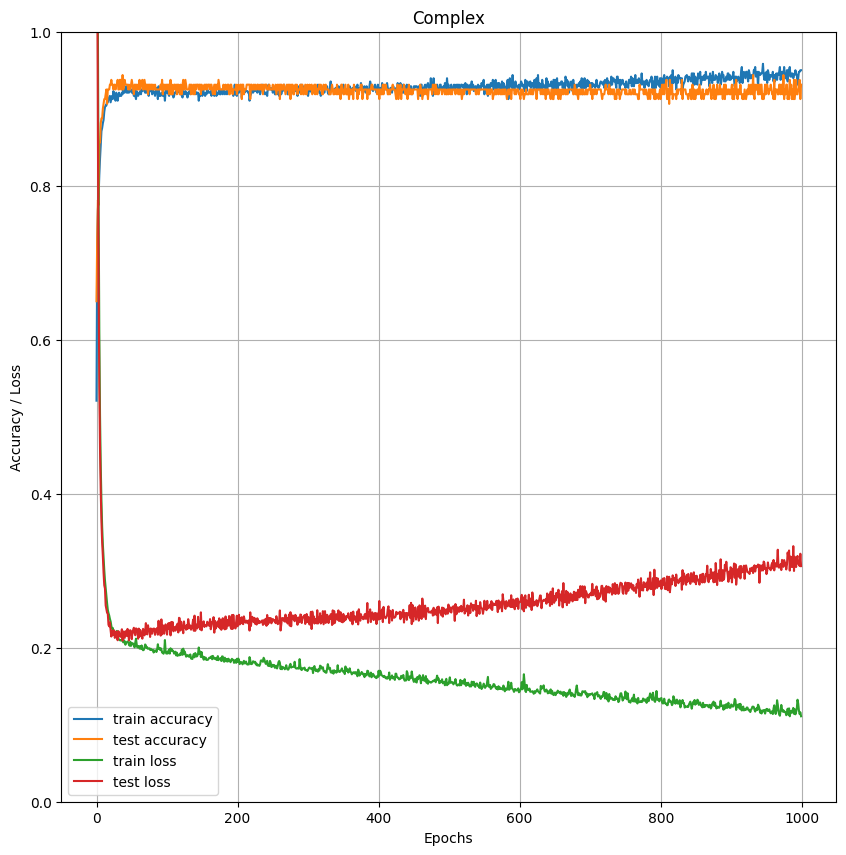

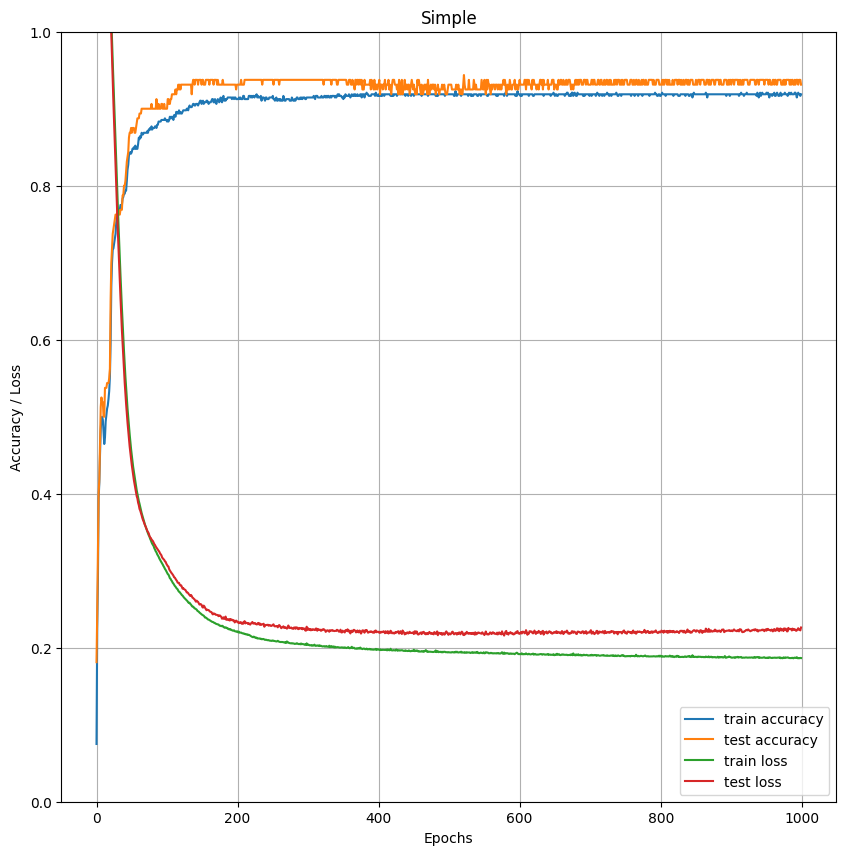

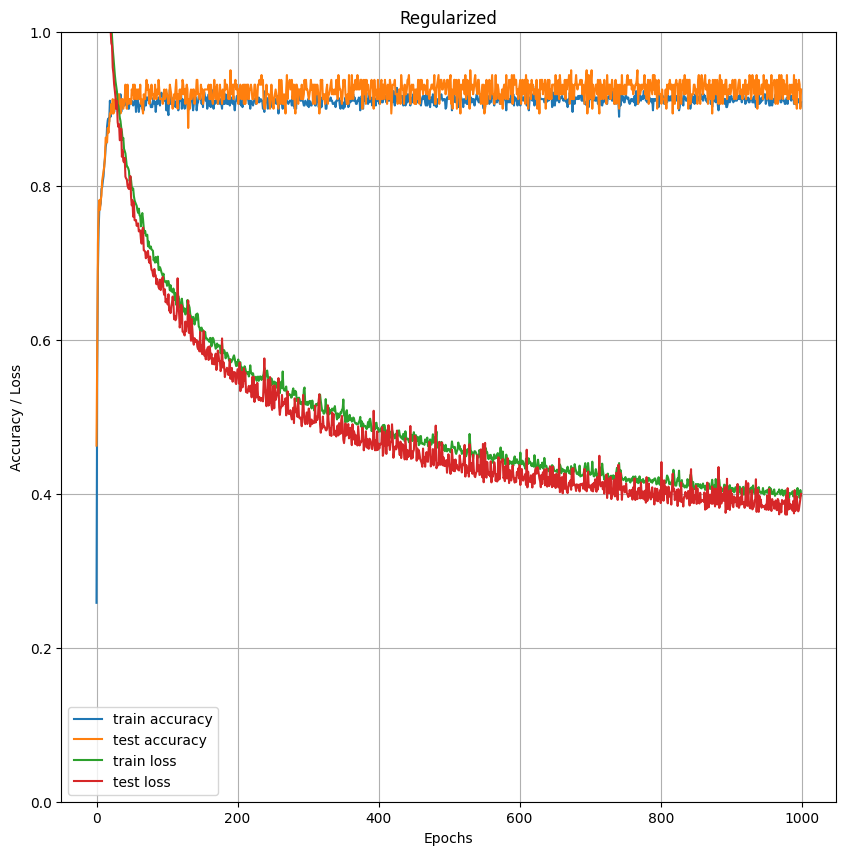

In [106]:
import pandas as pd

def plot_learning_curves(history, title):
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label = 'test accuracy')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label = 'test loss')
    plt.grid(True)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy / Loss")
    plt.gca().set_ylim(0,1)
    plt.title(title)
    plt.legend()
    plt.show()

plot_learning_curves(complex_model.history, "Complex")
plot_learning_curves(simple_model.history, "Simple")
plot_learning_curves(reg_model.history, "Regularized")


De estas gráficas podemos observar que:

Para el modelo complejo con menos de 50 iteraciones el error de validación empieza a subir drásticamente, por lo que es un buen momento para parar el entrenamiento. Vemos que si se elige más de 100 aproximadamente se produce overfitting, ya que la precisión de entrenamiento sube y la de test no sufre ninguna mejoría. En cuanto a la precision, se estabiliza antes de las 50 iteraciones. En general tiene una alta precisión tanto para entrenamiento como para test.

Para el modelo simple a partir de 100 aproximadamente, el error de validación empieza a subir y la pérdida se estabiliza, por lo que estas serían las iteraciones justas. Podemos ver que la precisión alcanza su máximo a partir de las 200 iteraciones. No se produce overfitting ya que en ningún caso la precisión de entrenamiento es mayor que la de test, esto cuadra con el hecho de que es un modelo simple.

Para el modelo regularizado el valor de "loss" para entrenamiento y para test no divergen notablemente y alcanzan su punto más bajo, que se pueda ver, en el 1000. No obstante no significa que haya que seguir entrenando ya que la precisión se estabiliza antes de las 200 iteraciones. Por último, su precisión es muy alta tanto para entrenamiento como para test, y no divergen notablemente. Entre otras cosas esto se debe a que los parámetros están regularizados y se puede ver, por la gráfica, como no sobreaprende.


# 5. CONCLUSIONES

Se puede ver que en el complejo con 1000 iteraciones se obtiene un 94% de precisión en el conjunto de entrenamiento y un 92% en el de test, por lo que se puede decir que hay overfitting, esto es esperaable ya que el modelo es muy complejo para los datos.

En el modelo simple con 1000 iteraciones se obtiene un 92% de precisión en el conjunto de entrenamiento y un 93% en el de test, por lo que se puede decir que no hay overfitting, esto son bastante buenos resultados ya que se trata de un modelo demasiado simple para estos datos.

En el modelo regularizado con 1000 iteraciones se obtiene un 92% de precisión en el conjunto de entrenamiento y un 92% en el de test, por lo que se puede decir que no hay overfitting, ademas se puede observar que el error de validación es menor que en el modelo simple, por lo que se puede decir que el modelo regularizado es mejor que el modelo simple.

Estos resultados son los esperados para cada tipo de red habiendo visto las gráficas.